In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from scipy import stats

pd.options.mode.chained_assignment = None
%matplotlib inline
sns.set_theme()

# Introduction

We downloaded our data in a csv format from [this](http://ww1.ourwoldindata.org/) website. We will look at the situation of the pandemic at a specific time: 1/11/2020 and we will study the following indicators for the pandemic:

* total_cases_per_million
* total_deaths_per_million
* total_cases

## Data

In the first study, we will examine whether there is a correlation between the above indicators and characteristics/features of different countries. The three characteristics that we will focus on from the data are:

* gpd_per_capita
* hospital_beds_per_thousand
* population_density

The study will be conducted in two ways:

1. through visualization, creating scatter plots for each pointer and features
2. calculating the Pearson Correlation Coefficient and the p-value

The African countries will then be removed and the study steps will be repeated. Finally, the study will be repeated only for European countries.

In [2]:
or_data = pd.read_csv('data/owid-covid-data.csv')
print(f"There are {or_data.shape[0]} registrations and {or_data.shape[1]} columns in our data.")
or_data.head()

There are 58698 registrations and 50 columns in our data.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


## Deletion of Columns

We want to work on a specific date: 1/11/2020 as well as with 6 different columns. So we delete the columns that we do not need.

In a new variable we will create a new DataFrame with the restriction that the date is the requested one. We keep the original data (in the variable or_data) for future use. Then in the new variable we calculate the mortality rate (mortality_rate) and keep only the columns we need.

* continent
* location
* indicators
* features

In [3]:
characteristics=["gdp_per_capita", "hospital_beds_per_thousand", 'population_density']
indicators=["total_cases_per_million", "total_deaths_per_million", "mortality_rate"]

data = or_data.loc[or_data['date'] == '2020-11-01']
data['mortality_rate'] = data['total_deaths'] / data['total_cases']
data = data[['continent', 'location', 'total_cases_per_million', 'total_deaths_per_million',
             'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 'population_density']]
print(data.shape)
data.head()

(215, 8)


,continent,location,total_cases_per_million,total_deaths_per_million,mortality_rate,gdp_per_capita,hospital_beds_per_thousand,population_density
228,North America,Aruba,42270.011,355.919,0.008420,35973.781,NaN,584.800
557,Asia,Afghanistan,1066.087,39.457,0.037011,1803.987,0.50,54.422
804,Africa,Angola,321.241,8.489,0.026425,5819.495,NaN,23.890
1046,North America,Anguilla,199.973,NaN,NaN,NaN,NaN,NaN
1306,Europe,Albania,7253.805,176.871,0.024383,11803.431,2.89,104.871


## Functions

We will build functions-tools for visualization, Pearson Correlation Coefficient calculation and p-values calculation

* The drawScatter function will visualize our data with scatter plots and will take as arguments:
    1. the Dataframe
    2. population_density feature

In [4]:
def draw_scatter(df, legend='continent'):
    df_g = sns.PairGrid(
        df,
        hue=legend,
        x_vars=characteristics,
        y_vars=indicators, 
        height=2.0, 
        aspect=3
    )
    df_g.map(plt.scatter)
    df_g.add_legend()

def draw_scatter_logarithmic_scale(df, legend="continent"):
    df_g = sns.PairGrid(
        df, hue=legend,
        x_vars=["gdp_per_capita", "hospital_beds_per_thousand", "log_population_density"],
        y_vars=indicators, 
        height=2.0, 
        aspect=3
    )
    df_g.map(plt.scatter)
    df_g.add_legend()
    
def calculate_pcc_and_p_values(data):
    for indicator in indicators:
        for characteristic in characteristics:
            indicator_data = data[indicator]
            characteristic_data = data[characteristic]
            not_nan = np.logical_or(indicator_data.isnull(), characteristic_data.isnull())
            r, p_value = stats.pearsonr(indicator_data[~not_nan], characteristic_data[~not_nan])
            print(f"Indicator: {indicator}, Characteristic: {characteristic}")
            print(f"PCC = {r}, p-value = {p_value}"+"\n")

## Visualize Using Scatter Plot

The characteristics will be placed on the x axis while the pointers will be placed on the y axis. Visualization will be done on a 3x3 Grid. The remarks are detailed in the report.

### Note
In our data there are several values which are NaN (empty). They are not included in the scatter-plot. With Shift-Tab on the sns PairGrid function we see that the dropna argument is initialized as False.

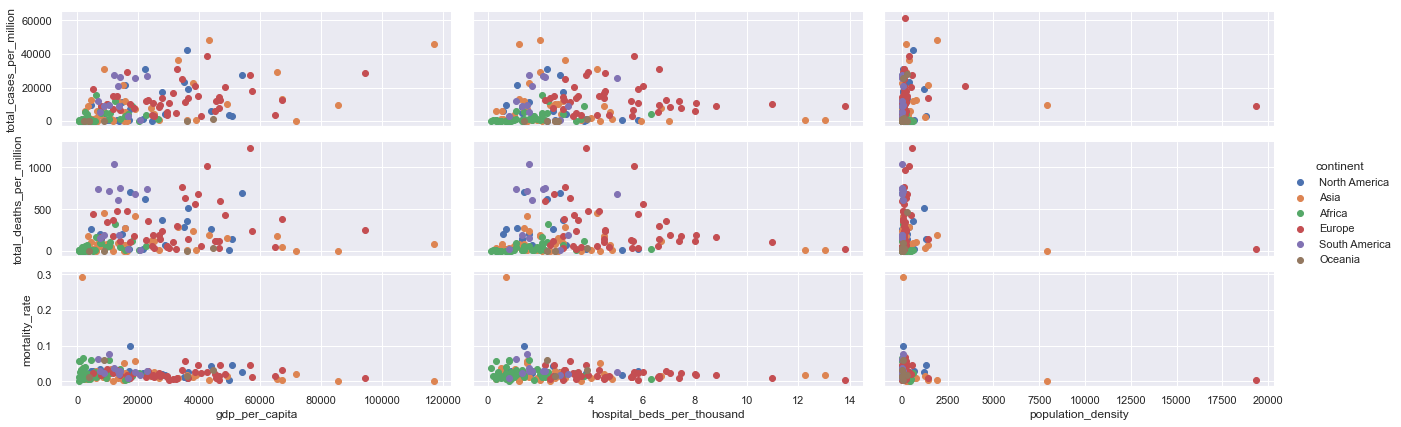

In [5]:
draw_scatter(data)

## Pearson Correlation Coefficient and P-values

Before proceeding with the calculations, we need to subtract the null values from our data. After the liquidation, we will proceed to their calculation.

### Data Cleaning

There are several null values in our indicators and characteristics. We will remove all entries in which there is even a null value in the indexes and attributes.

In [6]:
print(data.isnull().sum())

continent                      2
location                       0
total_cases_per_million        2
total_deaths_per_million      24
mortality_rate                23
gdp_per_capita                29
hospital_beds_per_thousand    48
population_density            13
dtype: int64


In [7]:
data = data.dropna(subset=['continent','total_cases_per_million','total_deaths_per_million', 
                           'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 
                           'population_density'], how='any')
data.shape

(147, 8)

###### Calculating Pearson Correlation Coefficient and p-values

In [8]:
calculate_pcc_and_p_values(data)

Indicator: total_cases_per_million, Characteristic: gdp_per_capita
PCC = 0.4977390852775592, p-value = 1.4172714685863103e-10

Indicator: total_cases_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.15205886360004955, p-value = 0.06597645420055864

Indicator: total_cases_per_million, Characteristic: population_density
PCC = 0.08408877917288711, p-value = 0.311244821019945

Indicator: total_deaths_per_million, Characteristic: gdp_per_capita
PCC = 0.21576274929226283, p-value = 0.008674016974881541

Indicator: total_deaths_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.07997470677671006, p-value = 0.335593943342972

Indicator: total_deaths_per_million, Characteristic: population_density
PCC = -0.06480443777950909, p-value = 0.4354940500942516

Indicator: mortality_rate, Characteristic: gdp_per_capita
PCC = -0.16666370305080036, p-value = 0.04363571199733636

Indicator: mortality_rate, Characteristic: hospital_beds_per_thousand
PCC = -0.1707402582832273, p-

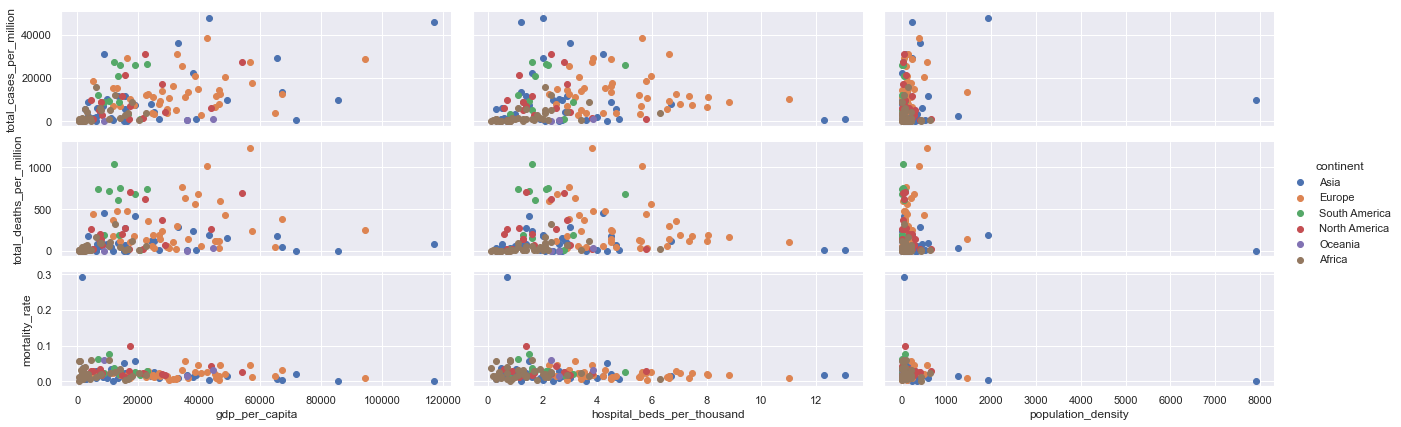

In [9]:
# visualize after the PCC calculation
draw_scatter(data)

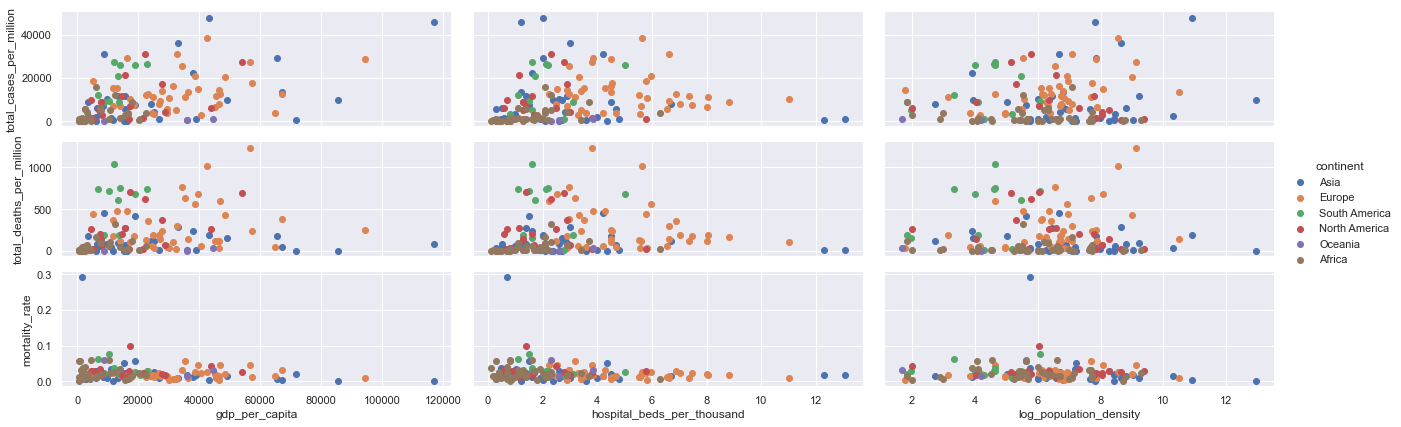

In [10]:
# visualize the log of population_density
data['log_population_density'] = np.log2(data['population_density'])
draw_scatter_logarithmic_scale(data)

## Deletion of Africa's Countries

To remove the countries we will follow the same steps as before. Next we will remove the entries where continent = 'Africa'

In [11]:
data_africa = or_data.loc[or_data['date'] == '2020-11-01']
data_africa['mortality_rate'] = data_africa['total_deaths'] / data_africa['total_cases']
data_africa = data_africa[['continent', 'location', 'total_cases_per_million', 'total_deaths_per_million', 
                           'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 'population_density']]
data_africa = data_africa.drop(index = data_africa[data_africa['continent'] == 'Africa'].index)
data_africa.head()

,continent,location,total_cases_per_million,total_deaths_per_million,mortality_rate,gdp_per_capita,hospital_beds_per_thousand,population_density
228,North America,Aruba,42270.011,355.919,0.008420,35973.781,NaN,584.800
557,Asia,Afghanistan,1066.087,39.457,0.037011,1803.987,0.50,54.422
1046,North America,Anguilla,199.973,NaN,NaN,NaN,NaN,NaN
1306,Europe,Albania,7253.805,176.871,0.024383,11803.431,2.89,104.871
1567,Europe,Andorra,61554.391,970.685,0.015770,NaN,NaN,163.755


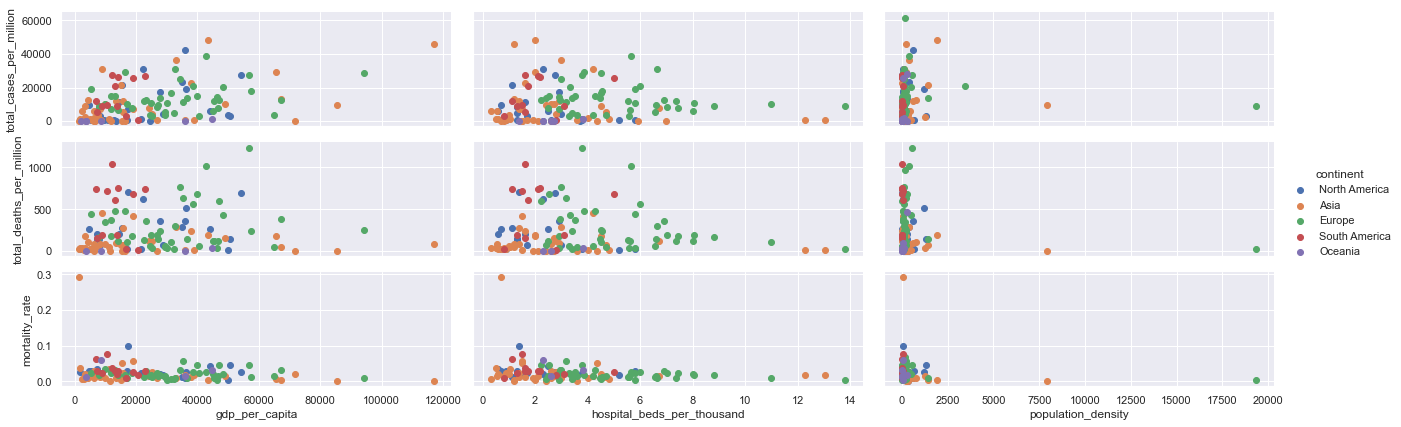

In [12]:
# visualize before the PCC and p-values calculation
draw_scatter(data_africa)

In [13]:
data_africa = data_africa.dropna(subset=['continent','total_cases_per_million','total_deaths_per_million', 
                                         'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 
                                         'population_density'], how='any')
print("WITH AFRICA\n")
calculate_pcc_and_p_values(data)
print("WITHOUT AFRICA\n")
calculate_pcc_and_p_values(data_africa)

WITH AFRICA

Indicator: total_cases_per_million, Characteristic: gdp_per_capita
PCC = 0.4977390852775592, p-value = 1.4172714685863103e-10

Indicator: total_cases_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.15205886360004955, p-value = 0.06597645420055864

Indicator: total_cases_per_million, Characteristic: population_density
PCC = 0.08408877917288711, p-value = 0.311244821019945

Indicator: total_deaths_per_million, Characteristic: gdp_per_capita
PCC = 0.21576274929226283, p-value = 0.008674016974881541

Indicator: total_deaths_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.07997470677671006, p-value = 0.335593943342972

Indicator: total_deaths_per_million, Characteristic: population_density
PCC = -0.06480443777950909, p-value = 0.4354940500942516

Indicator: mortality_rate, Characteristic: gdp_per_capita
PCC = -0.16666370305080036, p-value = 0.04363571199733636

Indicator: mortality_rate, Characteristic: hospital_beds_per_thousand
PCC = -0.1707402

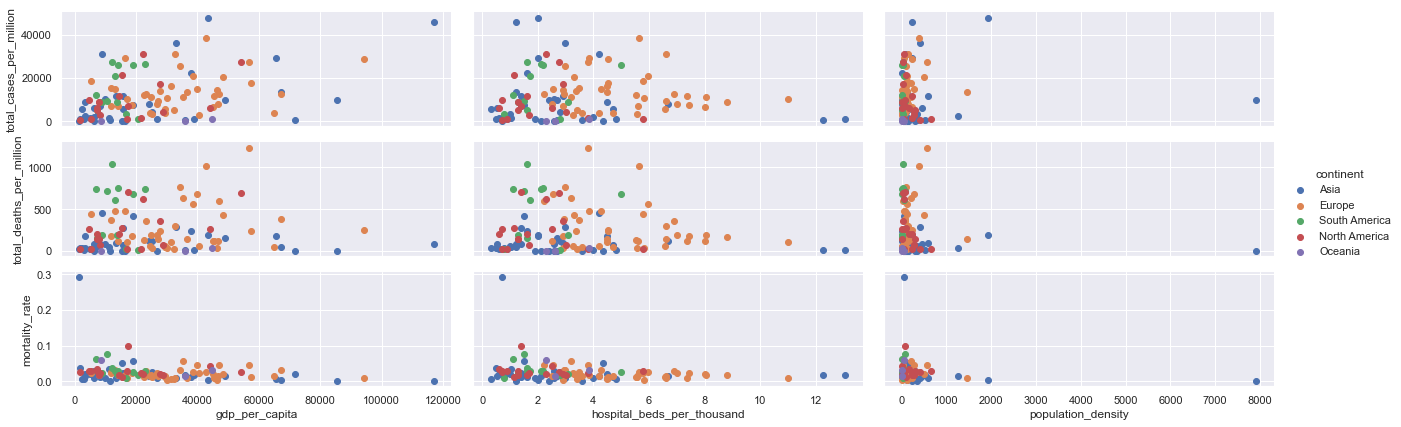

In [14]:
draw_scatter(data_africa)

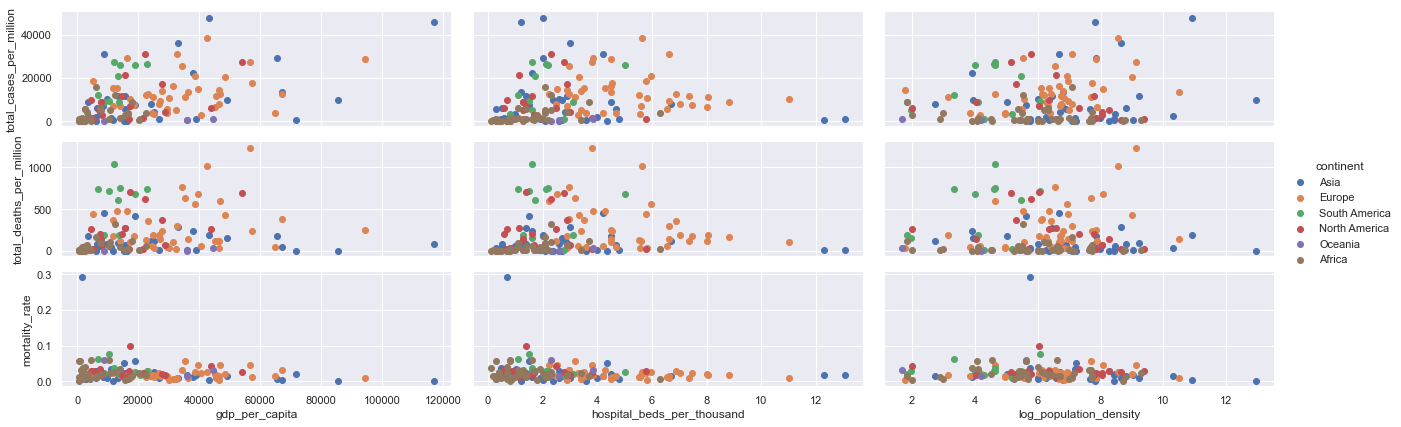

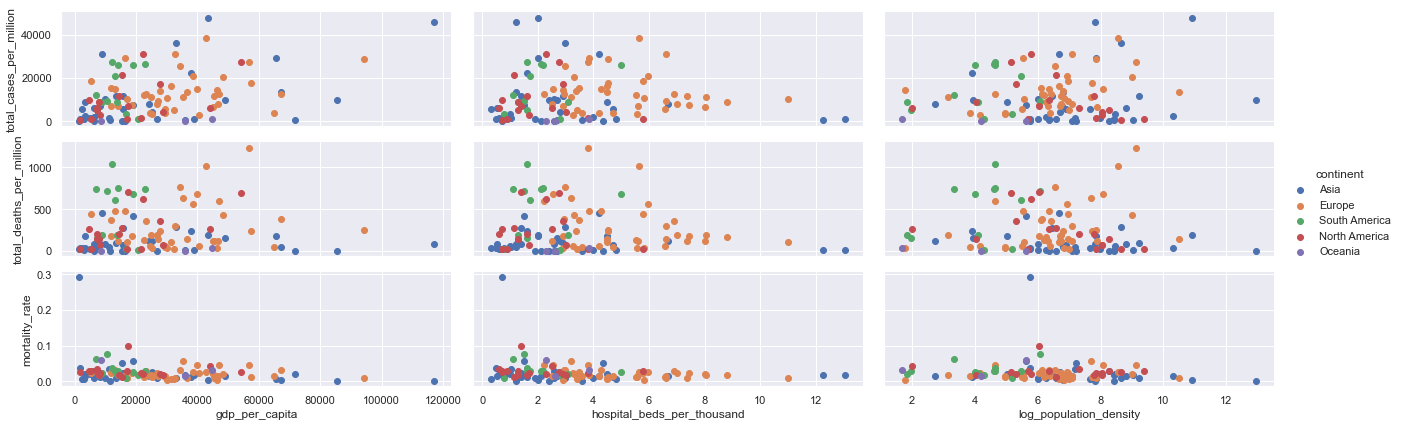

In [15]:
# log value
data_africa['log_population_density'] = np.log2(data_africa['population_density'])
draw_scatter_logarithmic_scale(data)
draw_scatter_logarithmic_scale(data_africa)

#### Repeat Procedure for Europe's Countries

In [16]:
europe_data = or_data.loc[or_data['date'] == '2020-11-01']
europe_data = europe_data.loc[europe_data['continent'] == 'Europe']
europe_data['mortality_rate'] = europe_data['total_deaths'] / europe_data['total_cases']
europe_data = europe_data[['continent', 'location', 'total_cases_per_million', 'total_deaths_per_million', 
                           'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 'population_density']]
europe_data.head()

,continent,location,total_cases_per_million,total_deaths_per_million,mortality_rate,gdp_per_capita,hospital_beds_per_thousand,population_density
1306,Europe,Albania,7253.805,176.871,0.024383,11803.431,2.890,104.871
1567,Europe,Andorra,61554.391,970.685,0.015770,NaN,NaN,163.755
3396,Europe,Austria,11834.251,121.802,0.010292,45436.686,7.370,106.749
4291,Europe,Belgium,38715.778,1022.812,0.026418,42658.576,5.640,375.564
5558,Europe,Bulgaria,7605.155,184.070,0.024203,18563.307,7.454,65.180


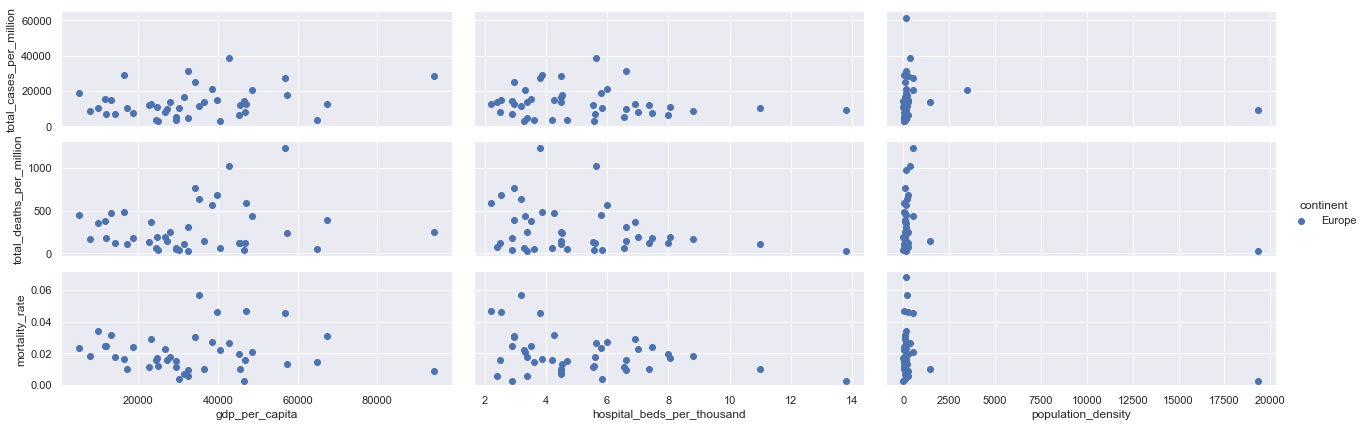

In [17]:
draw_scatter(europe_data)

In [18]:
europe_data = europe_data.dropna(subset=['continent','total_cases_per_million','total_deaths_per_million', 
                                         'mortality_rate', 'gdp_per_capita', 'hospital_beds_per_thousand', 
                                         'population_density'], how='any')
print("ALL\n")
calculate_pcc_and_p_values(data)
print("EUROPE ONLY\n")
calculate_pcc_and_p_values(europe_data)

ALL

Indicator: total_cases_per_million, Characteristic: gdp_per_capita
PCC = 0.4977390852775592, p-value = 1.4172714685863103e-10

Indicator: total_cases_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.15205886360004955, p-value = 0.06597645420055864

Indicator: total_cases_per_million, Characteristic: population_density
PCC = 0.08408877917288711, p-value = 0.311244821019945

Indicator: total_deaths_per_million, Characteristic: gdp_per_capita
PCC = 0.21576274929226283, p-value = 0.008674016974881541

Indicator: total_deaths_per_million, Characteristic: hospital_beds_per_thousand
PCC = 0.07997470677671006, p-value = 0.335593943342972

Indicator: total_deaths_per_million, Characteristic: population_density
PCC = -0.06480443777950909, p-value = 0.4354940500942516

Indicator: mortality_rate, Characteristic: gdp_per_capita
PCC = -0.16666370305080036, p-value = 0.04363571199733636

Indicator: mortality_rate, Characteristic: hospital_beds_per_thousand
PCC = -0.170740258283227

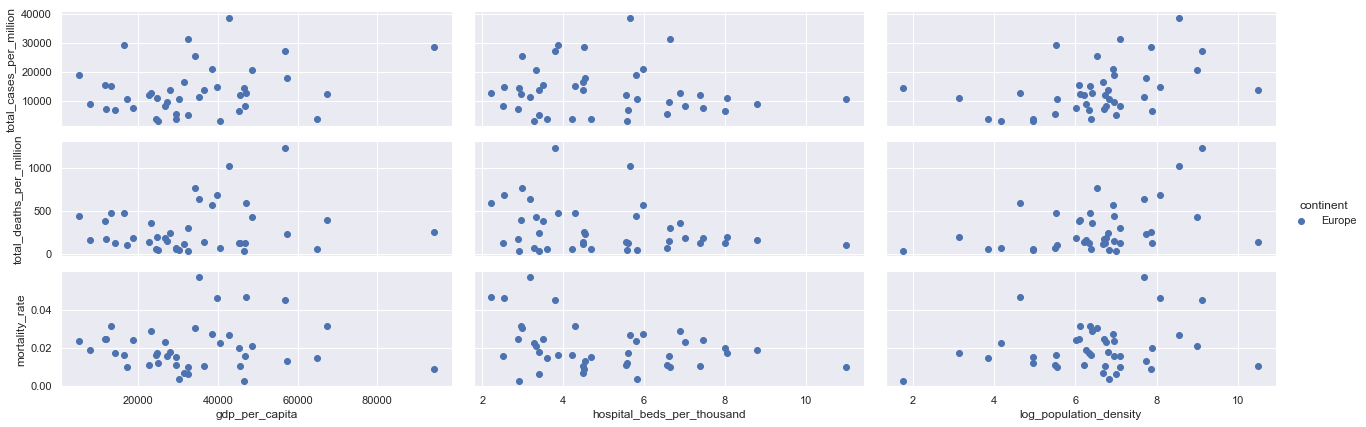

In [19]:
europe_data['log_population_density'] = np.log2(europe_data['population_density'])
draw_scatter_logarithmic_scale(europe_data)

# Different Continents

In this study, we will look at the differences in the indicators for the different continents. We will use the t-test to find the differences that are statistically significant. We will also create Bar plots with the average prices per continent. We will use the error bars offered by seaborn.

## Data

The data we are interested in are the index columns and the continents at a specific time: 1/11/2020

In [20]:
data_b = or_data.loc[or_data['date'] == '2020-11-01']
data_b['mortality_rate'] = data_b['total_deaths'] / data_b['total_cases']
data_b = data_b[['continent', 'total_cases_per_million', 'total_deaths_per_million',
             'mortality_rate']]

data_b = data_b.dropna(subset=['continent','total_cases_per_million','total_deaths_per_million', 
                                         'mortality_rate'], how='any')
print(data_b.shape)
data_b.head()

(190, 4)


,continent,total_cases_per_million,total_deaths_per_million,mortality_rate
228,North America,42270.011,355.919,0.008420
557,Asia,1066.087,39.457,0.037011
804,Africa,321.241,8.489,0.026425
1306,Europe,7253.805,176.871,0.024383
1567,Europe,61554.391,970.685,0.015770


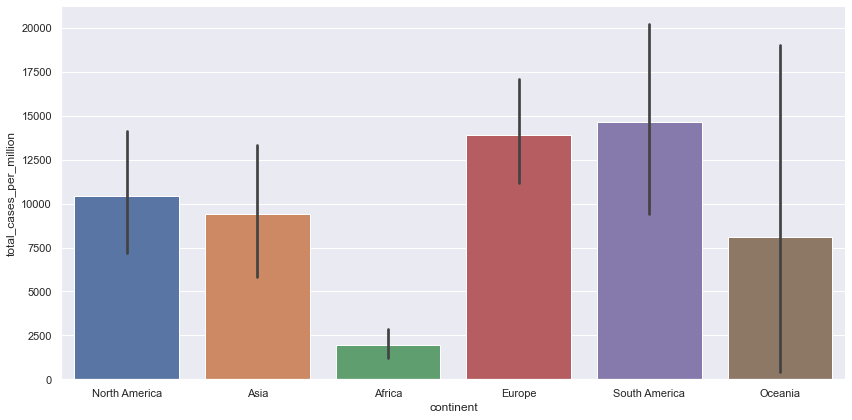

In [21]:
g = sns.catplot(x="continent", y=indicators[0],
               data=data_b, kind="bar",
                height=6, aspect=2)

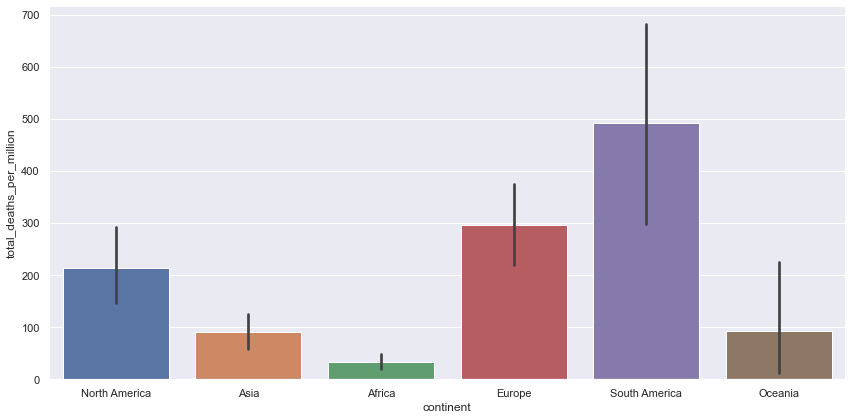

In [22]:
g = sns.catplot(x="continent", y=indicators[1],
               data=data_b, kind="bar",
                height=6, aspect=2);

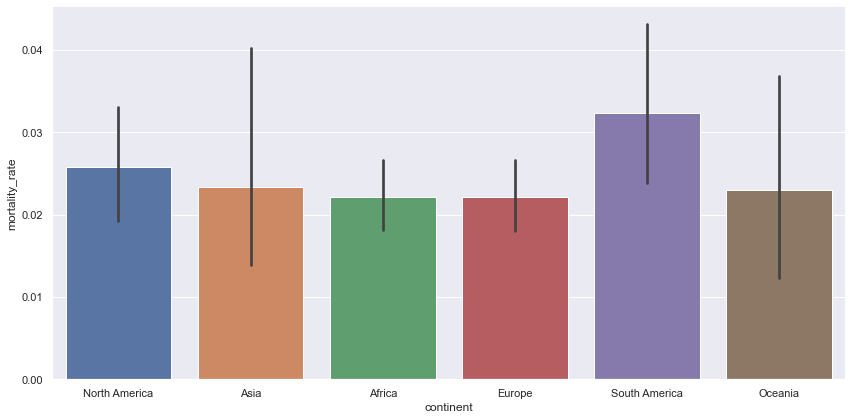

In [23]:
g = sns.catplot(x="continent", y=indicators[2],
               data=data_b, kind="bar",
                height=6, aspect=2);

## T-Test values

In a function with arguments the DataFrame and the continent we want to examine, we calculate the t-test with all the other continents for the three indicators we have.

In our report, we examine which differences are statistically significant.

In [24]:
# ttest calculation for a continent for every indicator and for every other continent
def calculate_ttest(data, continent_to_calc):
    continents = set(data['continent'])
    continents.remove(continent_to_calc)
    continent_groups = data.groupby('continent')
    for continent in continents:
        #total_deaths_per_million
        mr_na=continent_groups.get_group(continent).total_deaths_per_million
        mr_eu=continent_groups.get_group(continent_to_calc).total_deaths_per_million
        print(f"{continent_to_calc}, {continent} on total_deaths_per_million.")
        print(stats.ttest_ind(mr_na, mr_eu, equal_var = False))
        print('\n')
        
        #total_cases_per_million
        mr_na=continent_groups.get_group(continent).total_cases_per_million
        mr_eu=continent_groups.get_group(continent_to_calc).total_cases_per_million
        print(f"{continent_to_calc}, {continent} on total_cases_per_million.")
        print(stats.ttest_ind(mr_na, mr_eu, equal_var = False))
        print('\n')
        
        #mortality_rate
        mr_na=continent_groups.get_group(continent).mortality_rate
        mr_eu=continent_groups.get_group(continent_to_calc).mortality_rate
        print(f"{continent_to_calc}, {continent} on mortality_rate.")
        print(stats.ttest_ind(mr_na, mr_eu, equal_var = False))
        print('\n')

calculate_ttest(data_b, 'Europe')

Europe, Africa on total_deaths_per_million.
Ttest_indResult(statistic=-6.39893561359343, pvalue=5.120530097830046e-08)


Europe, Africa on total_cases_per_million.
Ttest_indResult(statistic=-7.396421464944963, pvalue=9.300022502007711e-10)


Europe, Africa on mortality_rate.
Ttest_indResult(statistic=0.013711843555852655, pvalue=0.989087689367925)


Europe, Oceania on total_deaths_per_million.
Ttest_indResult(statistic=-2.6811207016950216, pvalue=0.020659125120765016)


Europe, Oceania on total_cases_per_million.
Ttest_indResult(statistic=-1.1335929662228692, pvalue=0.29285913951805986)


Europe, Oceania on mortality_rate.
Ttest_indResult(statistic=0.11799276686423409, pvalue=0.9092638047784249)


Europe, North America on total_deaths_per_million.
Ttest_indResult(statistic=-1.4762842319577665, pvalue=0.1442149781866036)


Europe, North America on total_cases_per_million.
Ttest_indResult(statistic=-1.3726209465624586, pvalue=0.17495998531652276)


Europe, North America on mortality_rate

# Evolution of indicators for each Continent

We will work on our original data and not on a specific time period. We will study the evolution of our indicators over time, as a whole and for each continent. The steps we will follow are:

* Data breakdown by month, starting in January 2020
* Convert dates in the date column to datetime objects
* For each day we will calculate the total number of new cases, the total number of deaths and their cause
* a plot with the average prices per month, with confidence intervals
* and with a plot we will examine whether the number of cases increases exponentially

Finally, we will repeat the measurements per continent, and make a diagram with all the continents together.

## Split Data per month

We need to clean up our data. We will deal with the continents. So any entry with a null value in the continent column should be removed.

In [25]:
data_c = or_data[or_data['continent'].notna()]
# clearing 
data_c = data_c[['continent','date','new_cases', 'new_deaths']]
data_c.head()
data_c.dtypes

continent      object
date           object
new_cases     float64
new_deaths    float64
dtype: object

###### Convert date column into Datetime

In [26]:
print(f"The format of column data is: {data_c['date'][0]}")
data_c['date'] = pd.to_datetime(data_c.date)
print(f"After the conversion : {data_c['date'][0]}")
print(f" Usage of datetime: I can get the name of each month easily! The date of the first entry is: {data_c['date'][0]} and I can convert it to: {data_c.date.dt.day_name()[0]} {data_c.date.dt.month_name()[0]} {data_c.date.dt.year[0]}!")

The format of column data is: 2020-03-13
After the conversion : 2020-03-13 00:00:00
 Usage of datetime: I can get the name of each month easily! The date of the first entry is: 2020-03-13 00:00:00 and I can convert it to: Friday March 2020!


###### Having converted the column to datetime, we want to start our analysis from January 1, 2020 onwards. So we create a timestamp and filter our data. We also delete all duplicates values in the continent and date columns

In [27]:
timestamp = pd.to_datetime('2020-01-01')
print(f"Before the filtering, we had {data_c.shape[0]} entries, with the oldest date: {data_c.date.min()}")

data_c = data_c.loc[data_c.date >= timestamp, :]
print(f"After the filtering we have {data_c.shape[0]} entries with the older date: {data_c.date.min()}")

data_c = data_c.sort_values(by="date")
data_c['month'] = data_c.date.dt.month
data_c['day'] = data_c.date.dt.day
data_c = data_c.drop_duplicates(subset=["continent", "date", "new_cases", "new_deaths"])
data_c.head()

Before the filtering, we had 58040 entries, with the oldest date: 2019-12-31 00:00:00
After the filtering we have 57974 entries with the older date: 2020-01-01 00:00:00


,continent,date,new_cases,new_deaths,month,day
25996,Asia,2020-01-01,0.0,0.0,1,1
15159,Africa,2020-01-01,0.0,0.0,1,1
15488,South America,2020-01-01,0.0,0.0,1,1
16605,Europe,2020-01-01,0.0,0.0,1,1
34849,North America,2020-01-01,0.0,0.0,1,1


In [28]:
def calculate_daily(data, date, continent=None):
    if continent is None:
        return data[date.month][date.day]
    return data[continent][date.month][date.day]

In [29]:
nc = data_c.groupby([(data_c.date.dt.month),(data_c.date.dt.day)])['new_cases'].sum()
dc = data_c.groupby([(data_c.date.dt.month),(data_c.date.dt.day)])['new_deaths'].sum()
data_c['new_cases_summary'] = data_c.apply(lambda x: calculate_daily(nc, x['date']), axis=1)
data_c['new_deaths_summary'] = data_c.apply(lambda x: calculate_daily(dc, x['date']), axis=1)
data_c['mortality_rate'] = data_c['new_deaths_summary'] / data_c['new_cases_summary']

In [30]:
print(f"Max value of mortality rate is: {data_c['mortality_rate'].max()}")
data_c = data_c.replace([np.inf, -np.inf], np.nan)
print(f"After the conversion: {data_c['mortality_rate'].max()}")
data_c['mortality_rate'] = data_c['mortality_rate'].fillna(0)

data_c.head()

Max value of mortality rate is: inf
After the conversion: 1.0


,continent,date,new_cases,new_deaths,month,day,new_cases_summary,new_deaths_summary,mortality_rate
25996,Asia,2020-01-01,0.0,0.0,1,1,0.0,0.0,0.0
15159,Africa,2020-01-01,0.0,0.0,1,1,0.0,0.0,0.0
15488,South America,2020-01-01,0.0,0.0,1,1,0.0,0.0,0.0
16605,Europe,2020-01-01,0.0,0.0,1,1,0.0,0.0,0.0
34849,North America,2020-01-01,0.0,0.0,1,1,0.0,0.0,0.0


## Plot Creation

Per month we will calculate the average price and make a plot with confidence intervals from seaborn

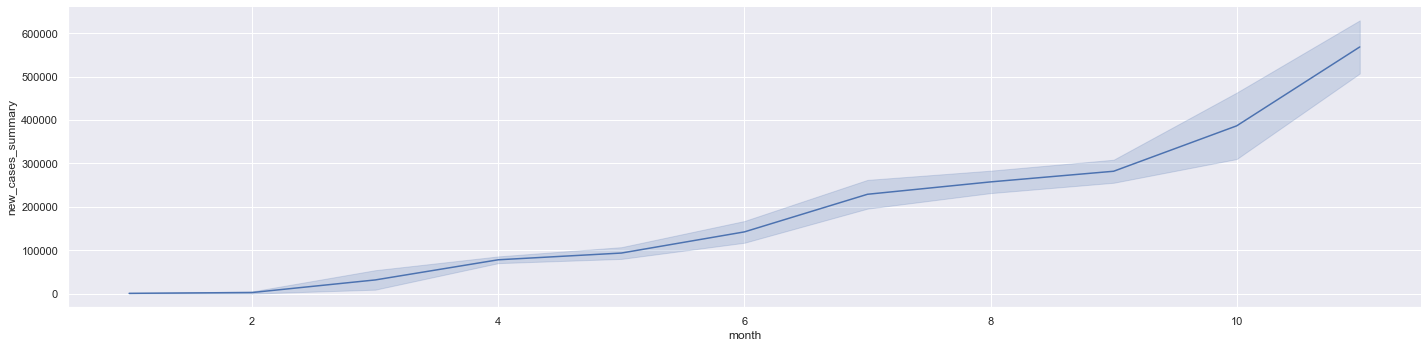

In [31]:
sns.relplot(data=data_c, x="month", y="new_cases_summary", kind="line", estimator="mean", ci="sd", height=5, aspect=4)

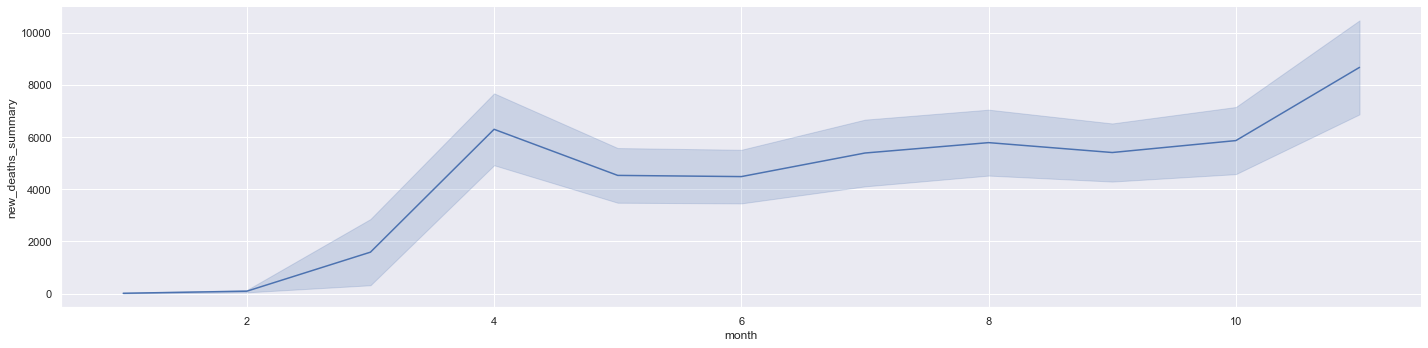

In [32]:
sns.relplot(data=data_c, x="month", y="new_deaths_summary", kind="line", estimator="mean", ci="sd", height=5, aspect=4)

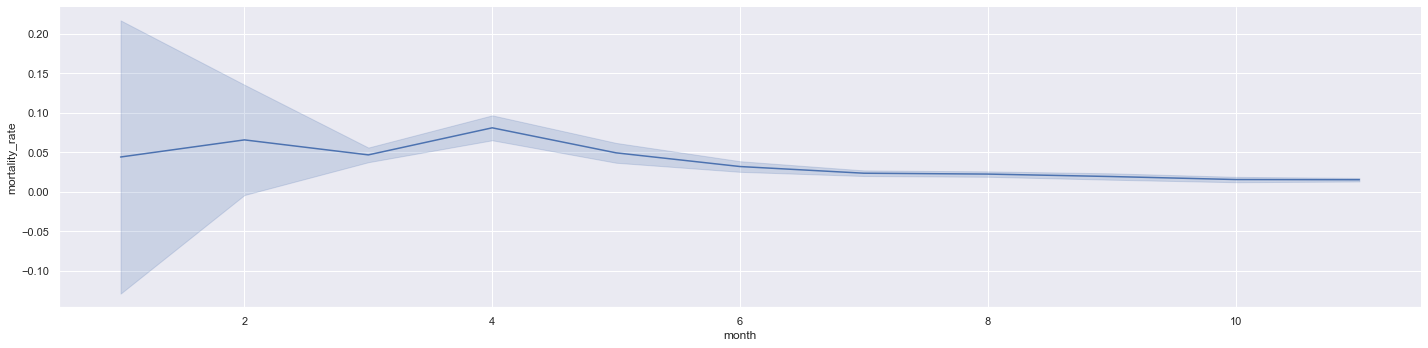

In [33]:
sns.relplot(data=data_c, x="month", y="mortality_rate", kind="line", estimator="mean", ci="sd", height=5, aspect=4)

###### Exponential growth of pandemic

<AxesSubplot:xlabel='month', ylabel='new_cases'>

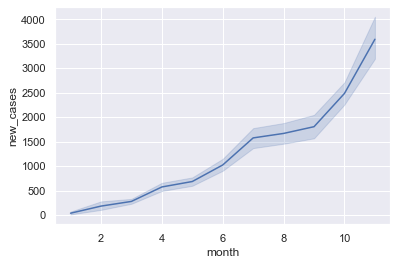

In [34]:
sns.lineplot(data=data_c, x="month", y="new_cases")

### Covid-19 per Continent

In [35]:
nc1 = data_c.groupby([('continent'),(data_c.date.dt.month),(data_c.date.dt.day)])['new_cases'].sum()
dc1 = data_c.groupby([('continent'),(data_c.date.dt.month),(data_c.date.dt.day)])['new_deaths'].sum()
data_c['new_cases_s_per_continent'] = data_c.apply(lambda x: calculate_daily(nc1, x['date'], x['continent']), axis=1)
data_c['new_deaths_s_per_continent'] = data_c.apply(lambda x: calculate_daily(dc1, x['date'], x['continent']), axis=1)

In [36]:
data_c =data_c[['continent', 'date', 'new_cases', 'new_deaths', 'month', 'day', 'new_cases_s_per_continent', 'new_deaths_s_per_continent']]
data_c['mortality_rate'] = data_c['new_deaths_s_per_continent'] / data_c['new_cases_s_per_continent']
data_c = data_c.replace([np.inf, -np.inf], np.nan)
data_c['mortality_rate'] = data_c['mortality_rate']

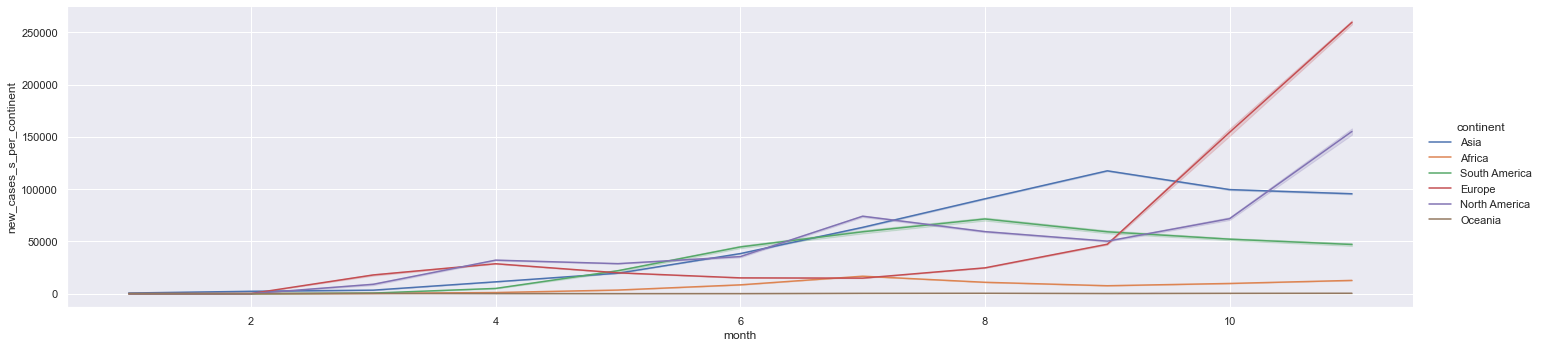

In [37]:
sns.relplot(data=data_c, x="month", y="new_cases_s_per_continent", hue="continent", kind="line", height=5, aspect=4)

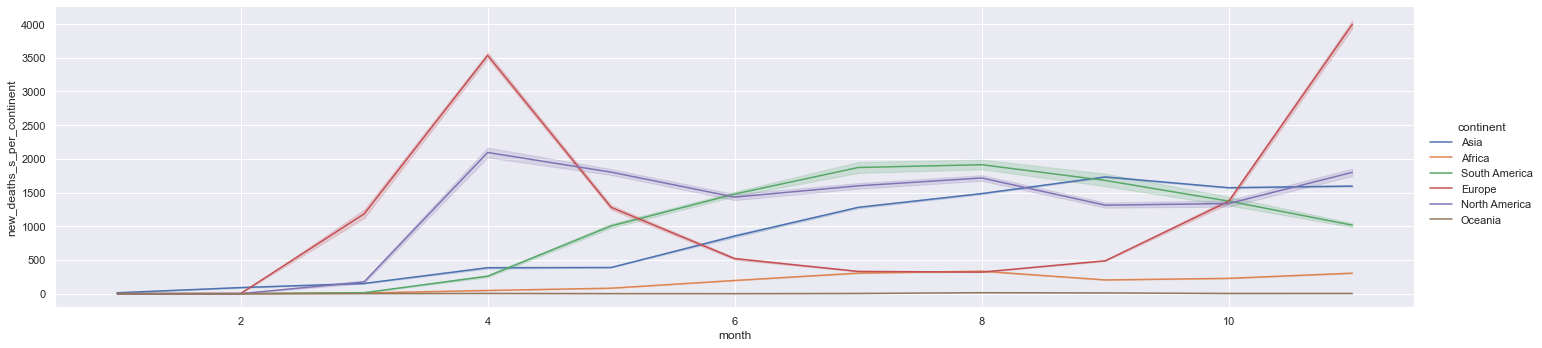

In [38]:
sns.relplot(data=data_c, x="month", y="new_deaths_s_per_continent", hue="continent", kind="line", height=5, aspect=4)

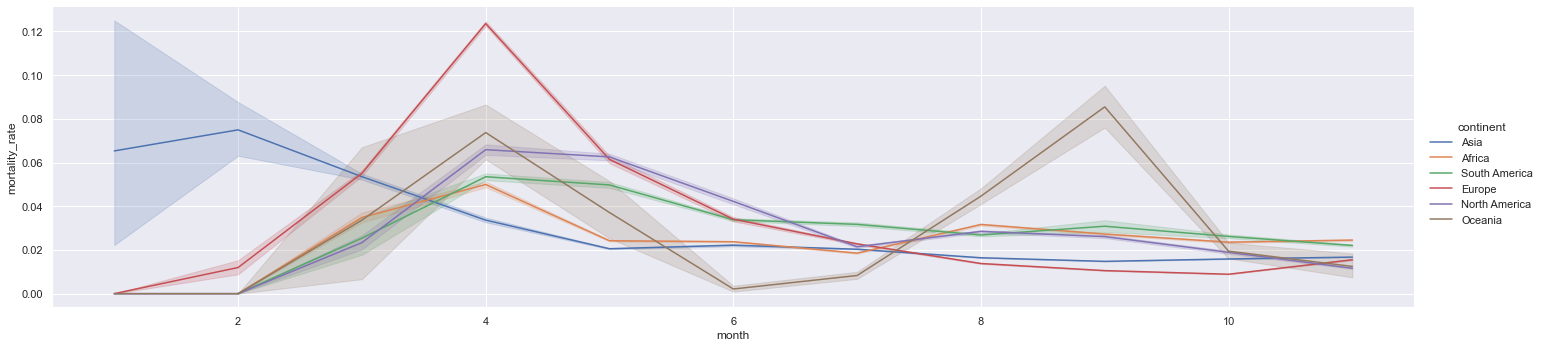

In [39]:
sns.relplot(data=data_c, x="month", y="mortality_rate", hue="continent", kind="line", height=5, aspect=4)

# The influence of the pandemic in the US

In the last part of the exercise we will look at the pandemic in the United States. The [CDC](https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days) has data on the current state of the pandemic by state. Also a file with the results from the recent elections, where for each state we have the information whether they elected Democrats (D) or Republicans (R). We are interested in examining whether there is a statistically interesting difference in the degree of outbreak of the pandemic depending on what the state votes for.

In [41]:
votes_per_state = pd.read_excel('data/covid-elections-usa/state-voting.xlsx')
del votes_per_state['Abbreviation']
votes_per_state.dtypes

State    object
Vote     object
dtype: object

In [43]:
covid_data_usa = pd.read_csv('data/covid-elections-usa/united_states_covid19_cases_and_deaths_by_state.csv', header=2)

covid_data_usa = covid_data_usa[['State/Territory','Total Cases','Total Deaths']]

# Add NYC numbers to NY
covid_data_usa.at[38, 'Total Cases'] += covid_data_usa.at[39, 'Total Cases']
covid_data_usa.at[38, 'Total Deaths'] += covid_data_usa.at[39, 'Total Deaths']

# Remove NYC
covid_data_usa = covid_data_usa.drop(index=39)
covid_data_usa['mortality_rate'] = covid_data_usa['Total Deaths'] / covid_data_usa['Total Cases']
#covid_data_usa.iloc[30]
votes_per_state =votes_per_state.rename(columns={'State': 'state'})
covid_data_usa = covid_data_usa.rename(columns={'State/Territory': 'state'})
covid_data_usa = covid_data_usa.rename(columns={'Total Cases': 'total_cases'})
covid_data_usa = covid_data_usa.rename(columns={'Total Deaths': 'total_deaths'})

# join dataframes on state name
covid_data_usa = covid_data_usa.merge(votes_per_state, how='inner', left_on='state', right_on='state')
covid_data_usa = covid_data_usa.rename(columns={'Vote': 'vote'})
covid_data_usa

,state,total_cases,total_deaths,mortality_rate,vote
0,Alaska,27669,115,0.004156,R
1,Alabama,236865,3472,0.014658,R
2,Arkansas,148312,2405,0.016216,R
3,Arizona,306868,6515,0.021231,D
4,California,1125699,18769,0.016673,D
5,Colorado,206439,2860,0.013854,D
6,Connecticut,107280,4881,0.045498,D
7,District of Columbia,20409,673,0.032976,D
8,Delaware,32664,757,0.023175,D
9,Florida,938830,18157,0.019340,R


In [44]:
def draw_bar(y_val):
    g = sns.catplot(x='state', y=y_val, hue='vote',
               data=covid_data_usa, kind="bar", palette=sns.color_palette("Set2"),
                height=5, aspect=3);
    g.set_xlabels('States')
    g.set_xticklabels(rotation=45, ha='right')

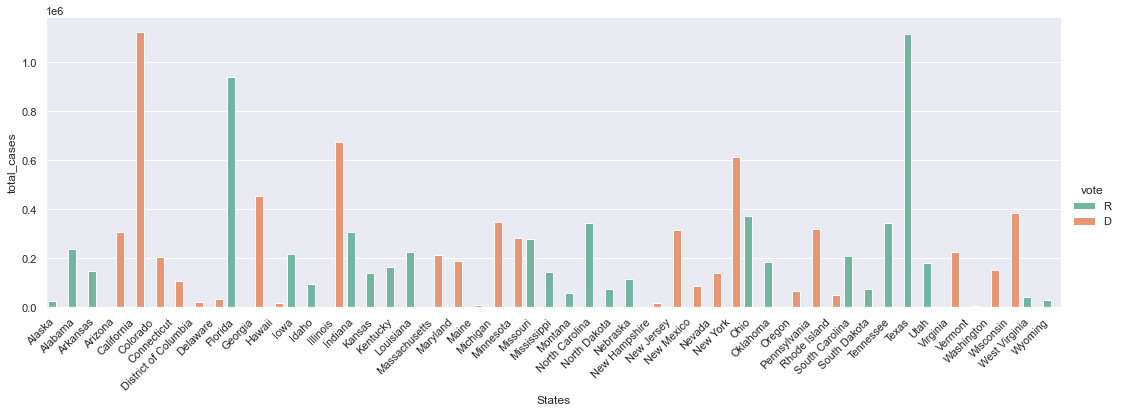

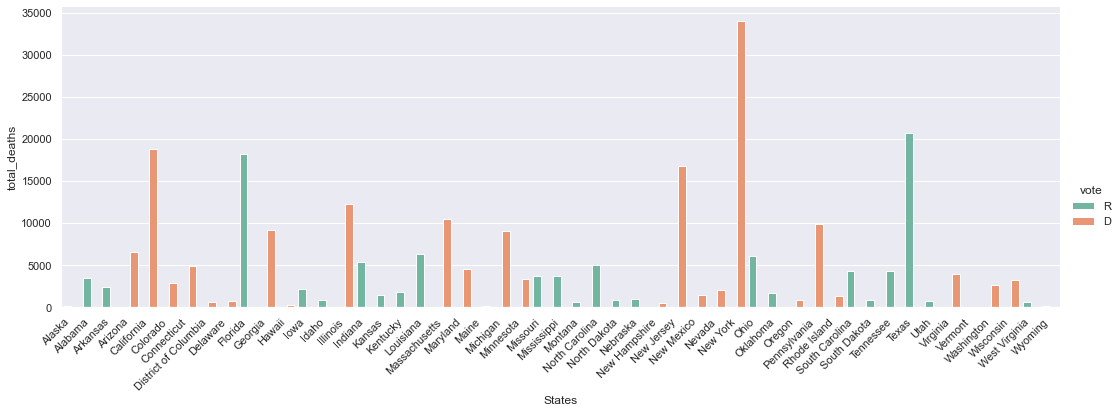

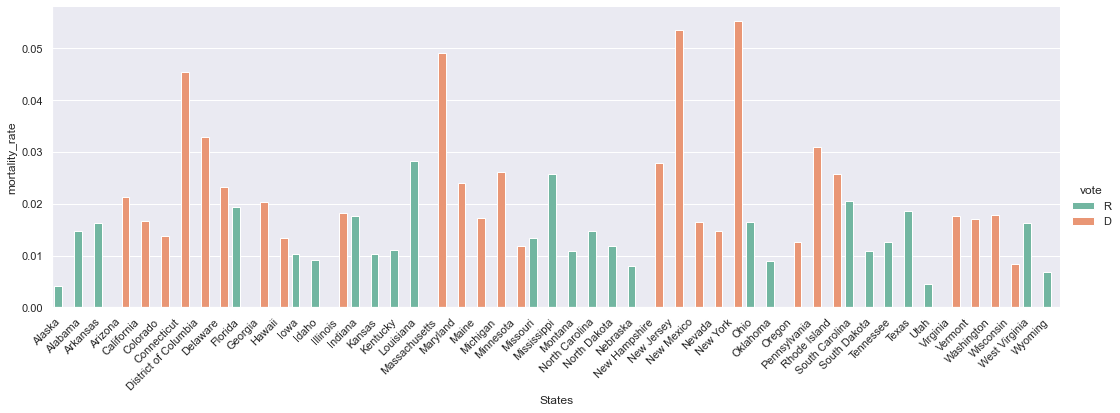

In [45]:
draw_bar('total_cases')
draw_bar('total_deaths')
draw_bar('mortality_rate')

## T-Test

In [46]:
def run_ttest(a , b, metric):
    print(f"Republicants, Democrats on {metric}.")
    print(stats.ttest_ind(a, b, equal_var = False))
    print("\n")

# Group by votes
vote_groups = covid_data_usa.groupby('vote')

# 2 groups
democrats = vote_groups.get_group('D')
republicants =  vote_groups.get_group('R')

# Total_cases
republicants_total_cases = republicants.total_cases
democrats_total_cases = democrats.total_cases

# Total_deaths
republicants_total_deaths = republicants.total_deaths
democrats_total_deaths = democrats.total_deaths

# Mortality_rate
republicants_mortality_rate = republicants.mortality_rate
democrats_mortality_rate = democrats.mortality_rate

run_ttest(republicants_total_cases, democrats_total_cases, "total_cases")
run_ttest(republicants_total_deaths, democrats_total_deaths, "total_deaths")
run_ttest(republicants_mortality_rate, democrats_mortality_rate, "mortality_rate")

Republicants, Democrats on total_cases.
Ttest_indResult(statistic=-0.028194659644382444, pvalue=0.9776216631918364)


Republicants, Democrats on total_deaths.
Ttest_indResult(statistic=-1.2687321514763772, pvalue=0.2112812298015635)


Republicants, Democrats on mortality_rate.
Ttest_indResult(statistic=-3.7775491546653326, pvalue=0.0005870058418792279)


